In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
from preprocessing import get_all_sheet_names, read_excel_by_sheet
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test
from path import *

action_prop = 0.25
block_prop = 0.6
meal_config=[60, 2]
day = 3
import os
os.makedirs('../export/Figure 3', exist_ok=True)

In [4]:
ctrl_learning_result = []
ctrl_scores = []
ctrl_blocks_lists = []

for sheet in rev_ctrl_sheets[:]:
    data = read_excel_by_sheet(sheet, rev_ctrl_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    ctrl_blocks_lists.append(blocks)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    ctrl_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

cask_scores = []
cask_learning_result = []
cask_blocks_lists = []
for sheet in rev_cask_sheets[:]:
    data = read_excel_by_sheet(sheet, rev_cask_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    cask_blocks_lists.append(blocks)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    cask_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

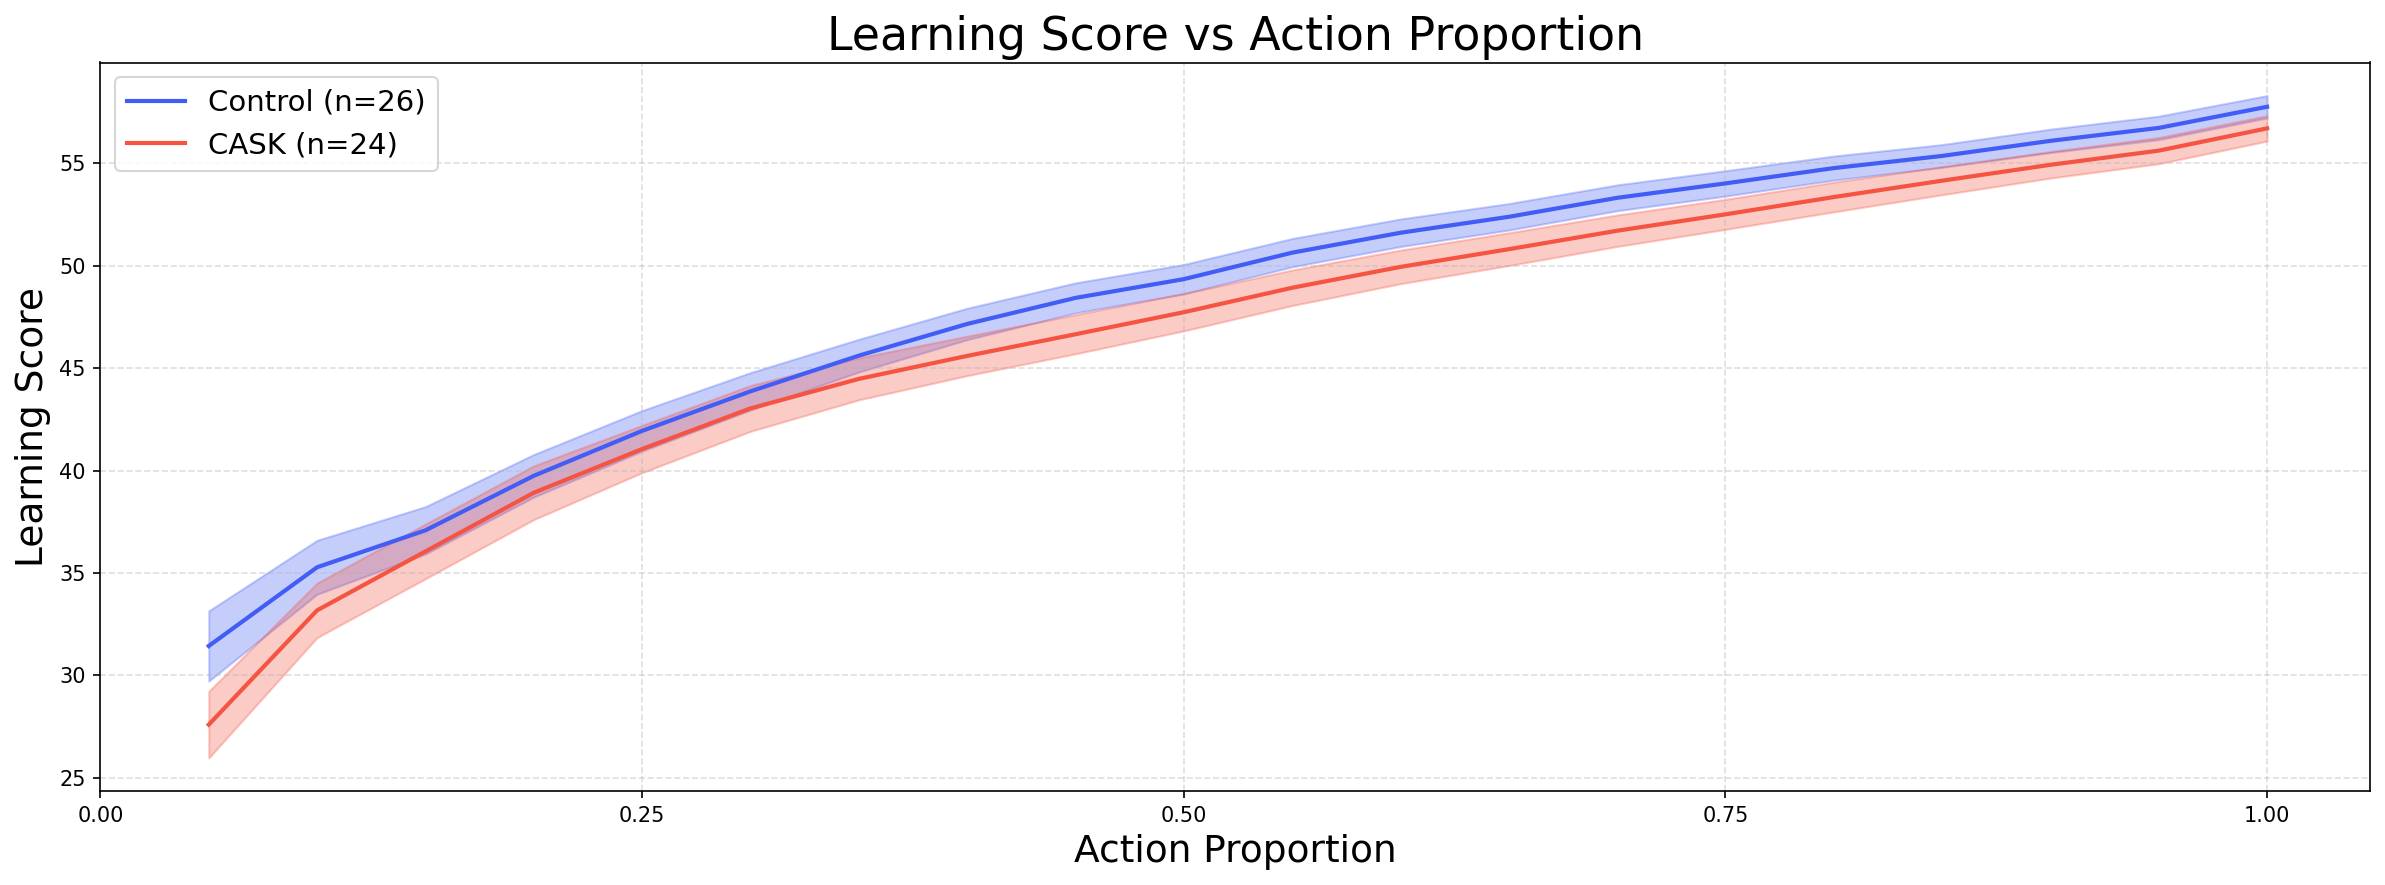

In [4]:
dit.plot_learning_score_trend(
    blocks_groups=[ctrl_blocks_lists, cask_blocks_lists],
    group_labels=["Control", "CASK"],
    export_path="../export/Figure 3/CASK_learning_score_trend.svg"
)

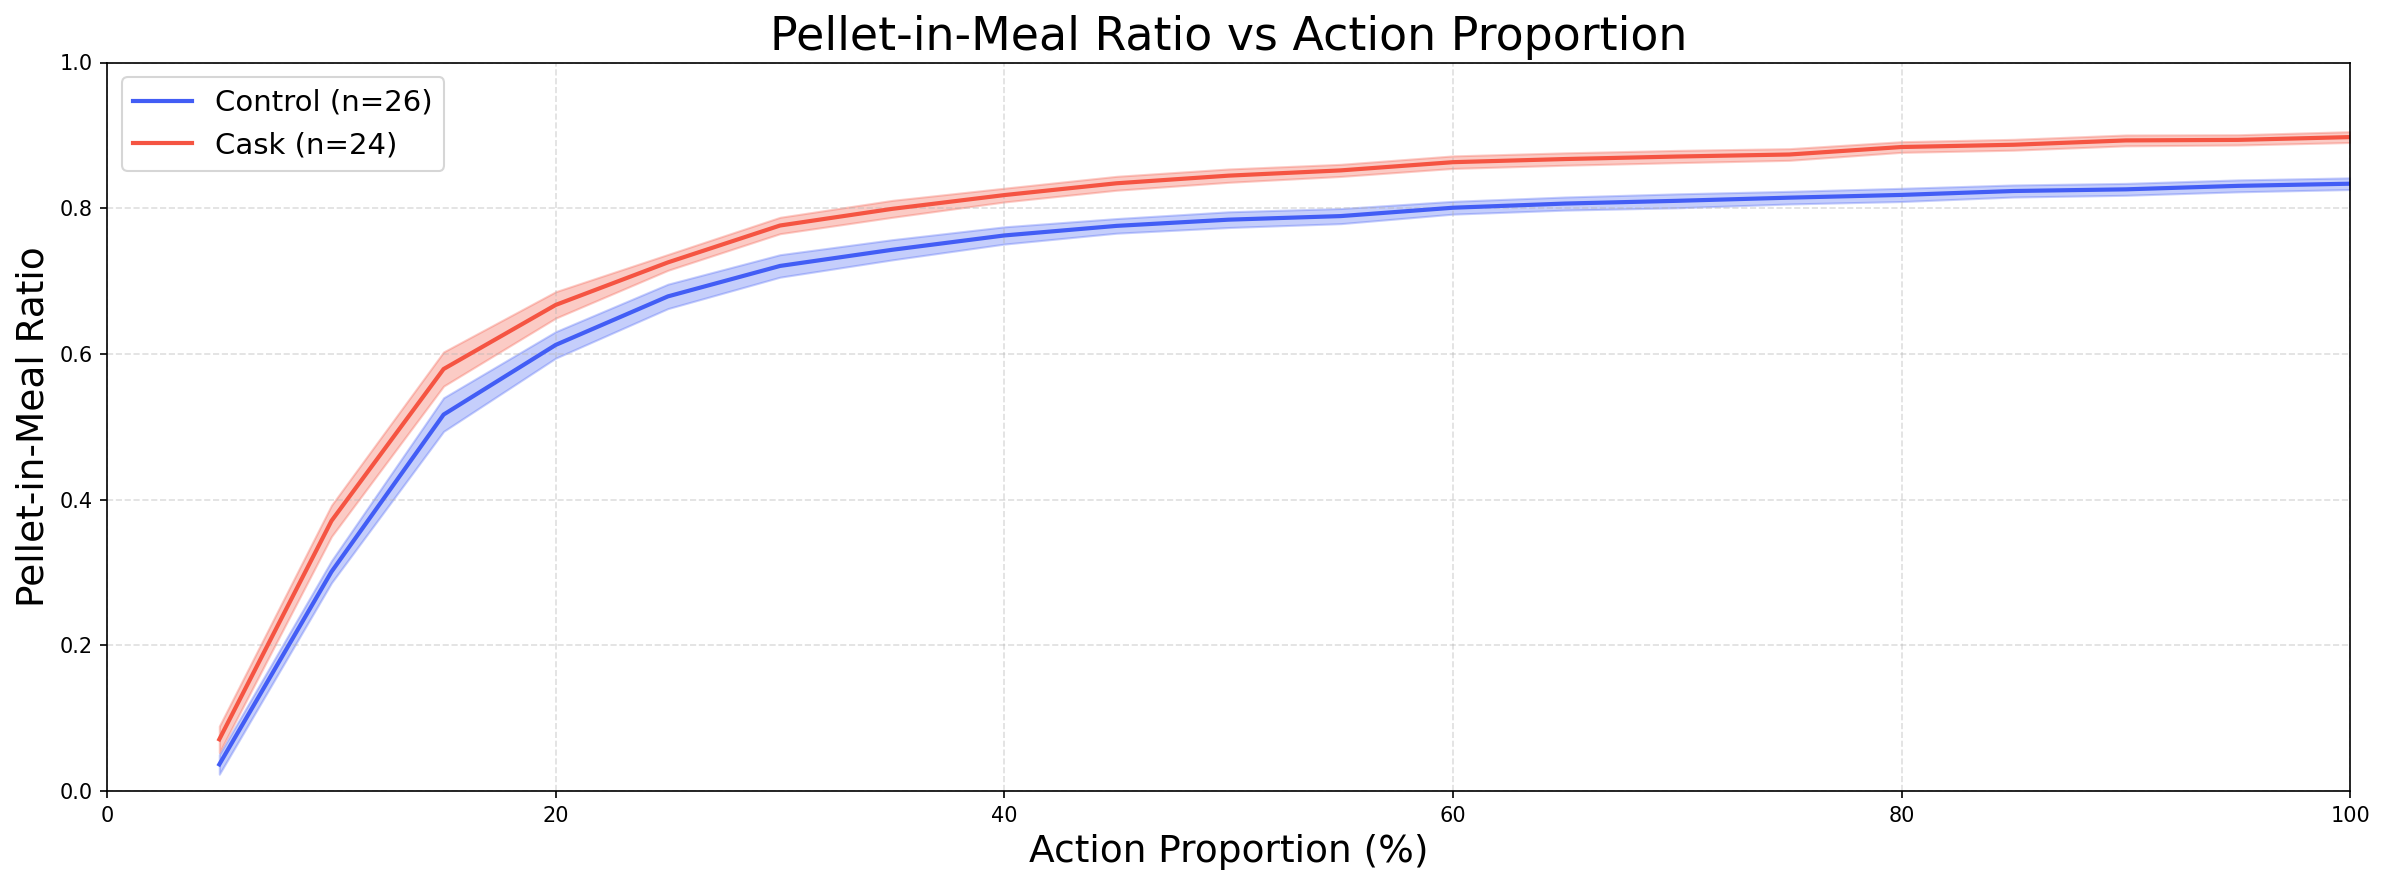

In [5]:
dit.plot_pellet_ratio_trend(
    blocks_groups=[ctrl_blocks_lists, cask_blocks_lists],
    group_labels=["Control", "Cask"],
    export_path="../export/Figure 3/CASK_pellet_in_meal_ratio.svg"
)

In [3]:
perform_T_test(ctrl_scores, cask_scores, test_side='two-sided')

P Value is  0.13234575177063937
There is no significant difference between the two groups.


Ctrl Size: 26   Avg: 41.938   SE: 0.991
Cask  Size: 24   Avg: 41.051   SE: 1.155


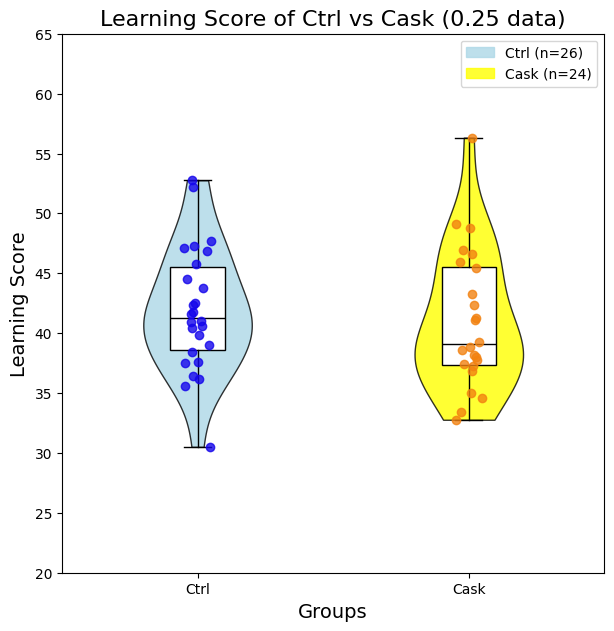

In [7]:
dit.graph_learning_score(ctrl_scores, cask_scores, group_names=['Ctrl', 'Cask'], proportion=action_prop, 
                         export_path=f'../export/Figure 3/CASK_{int(action_prop*100)}_learning_score.svg'
                         )

In [5]:
perform_T_test(ctrl_learning_result, cask_learning_result, test_side='greater')

P Value is  0.8887296219209795
There is no significant difference between the two groups.


Ctrl Size: 26   Avg: 64.810   SE: 0.707
Cask  Size: 24   Avg: 63.544   SE: 0.710


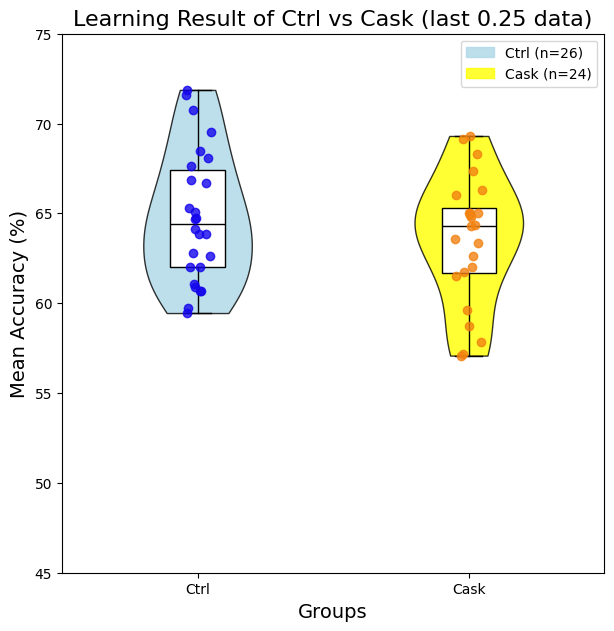

In [6]:
dit.graph_learning_results(ctrl_learning_result, cask_learning_result, proportion=0.25, group_names=['Ctrl', 'Cask'],
                            export_path='../export/Figure 3/CASK_learning_result.svg')

### Pellet Collect Time

In [7]:
export_root = '../export/Figure 4/'
os.makedirs(os.path.join(export_root, 'CASK_retrieval_time'), exist_ok=True)

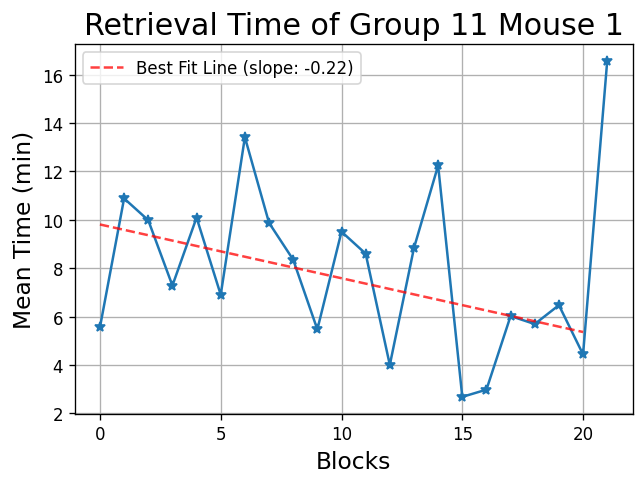

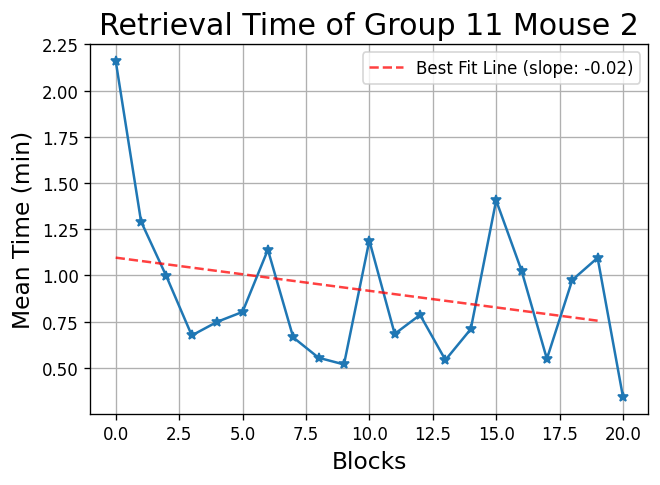

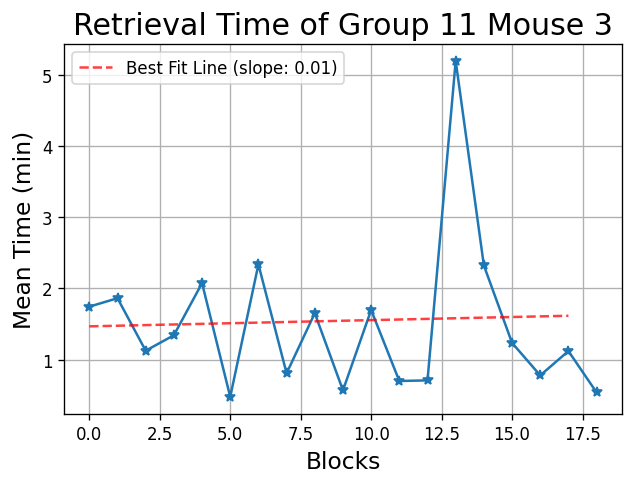

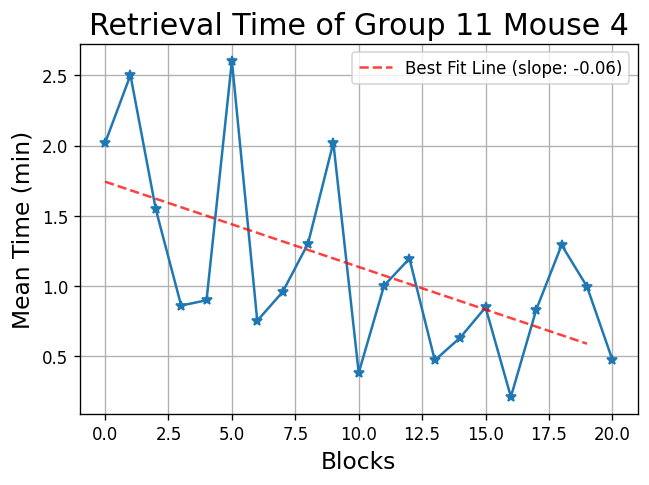

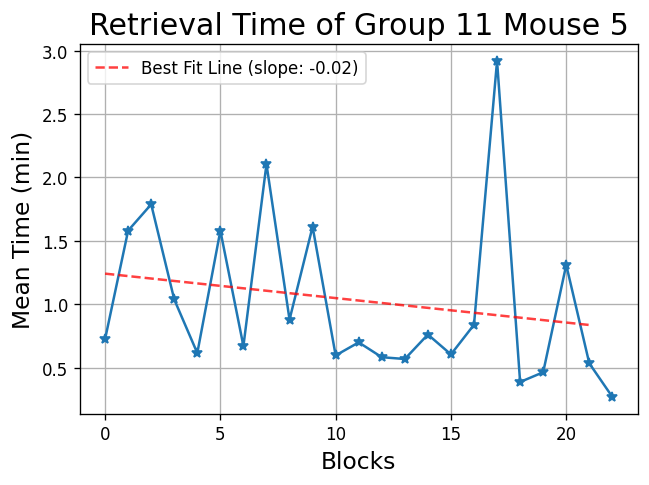

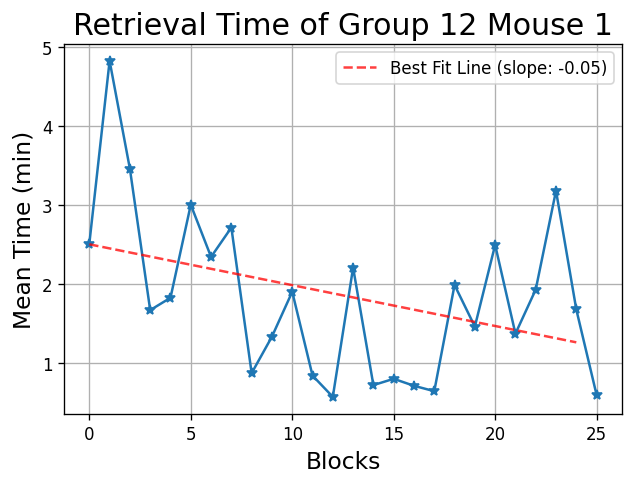

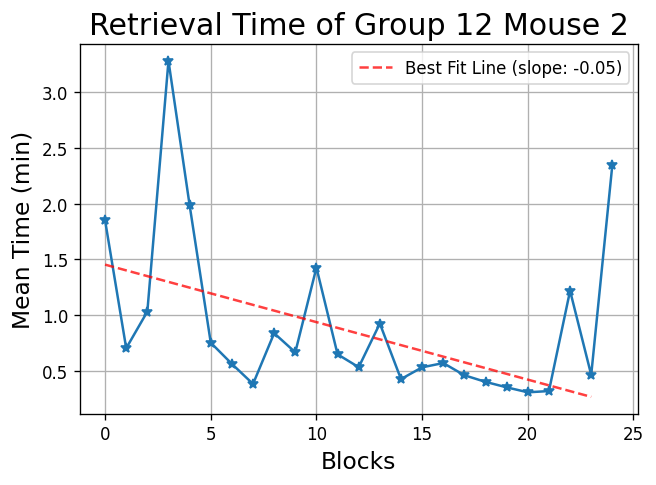

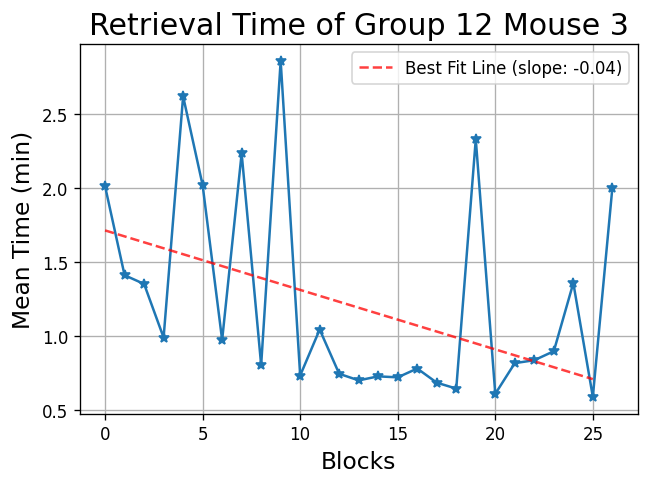

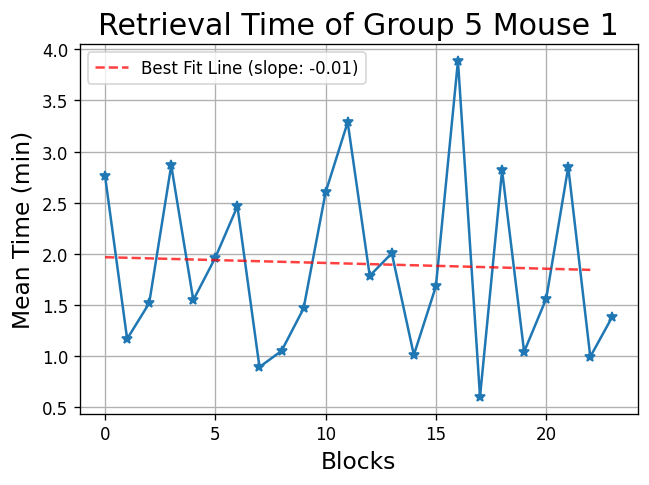

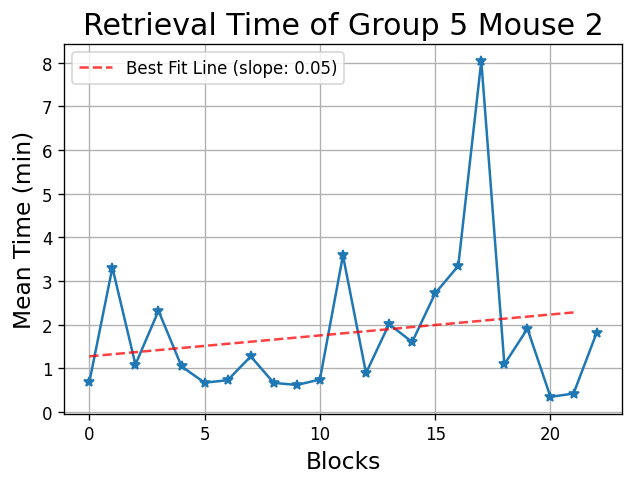

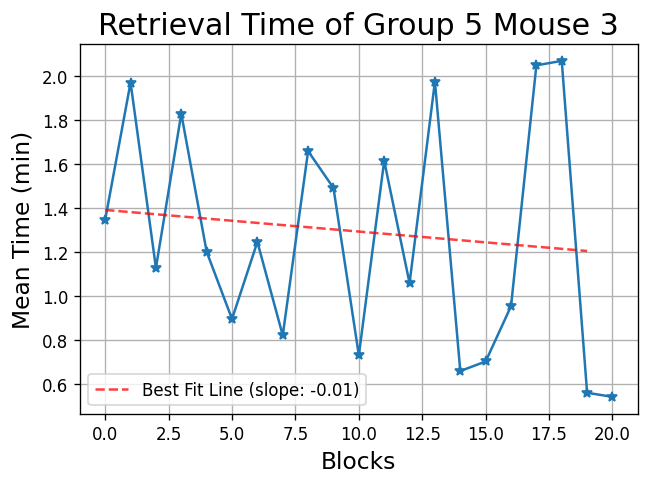

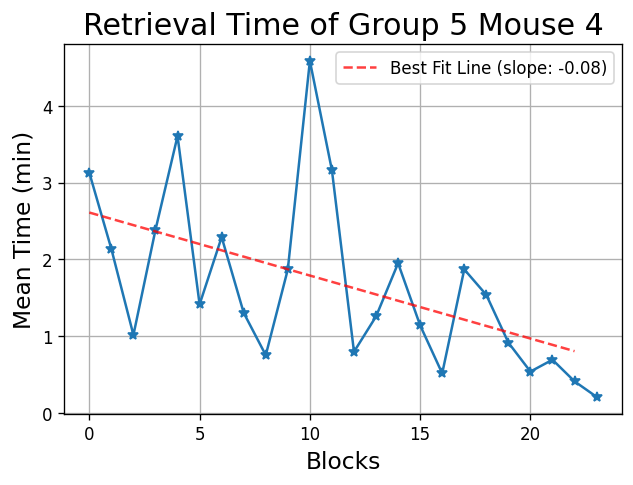

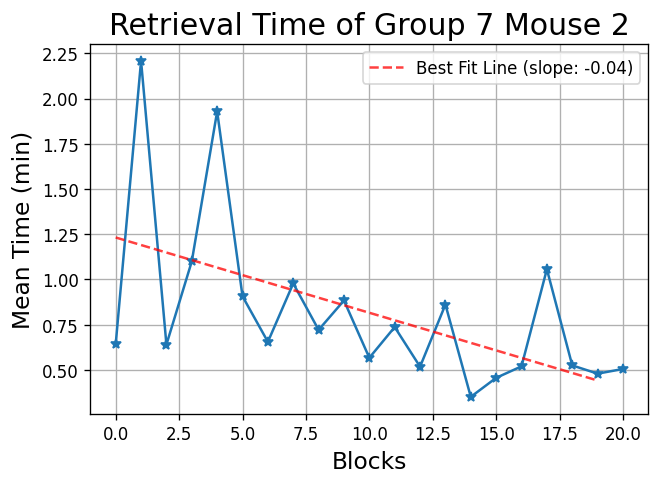

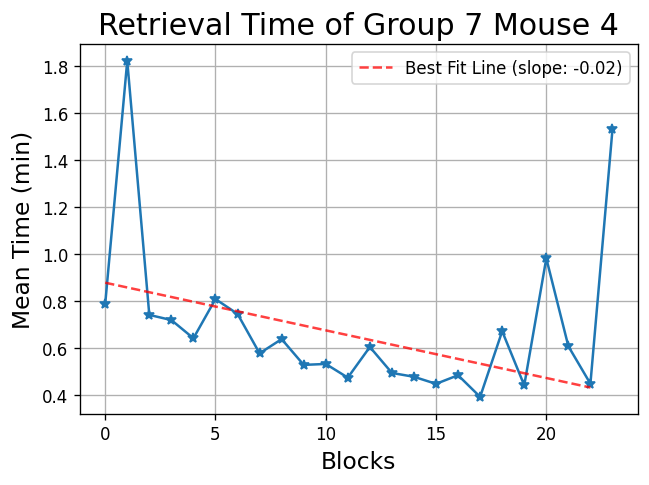

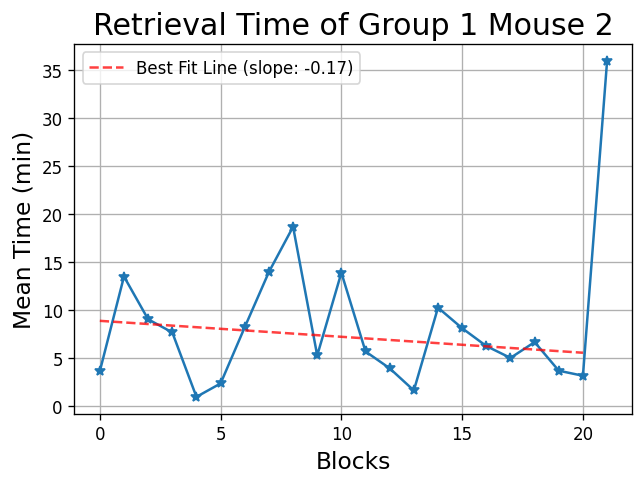

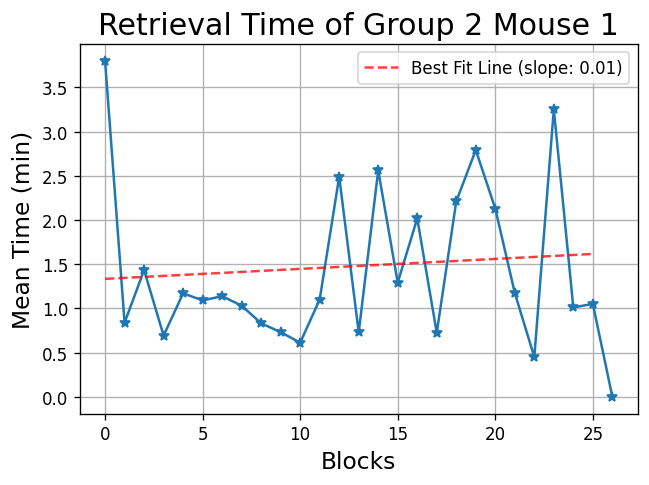

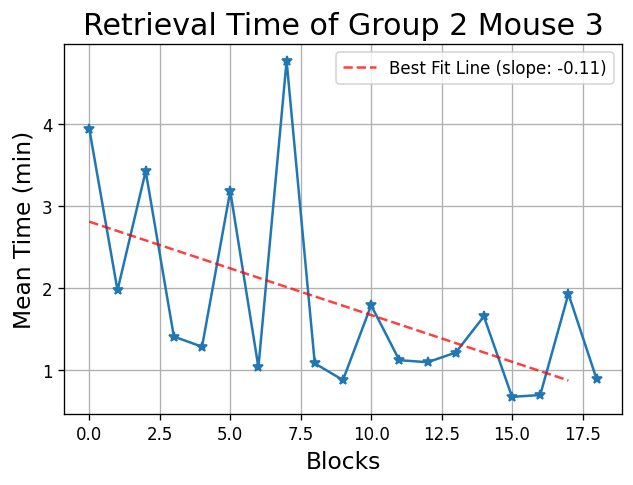

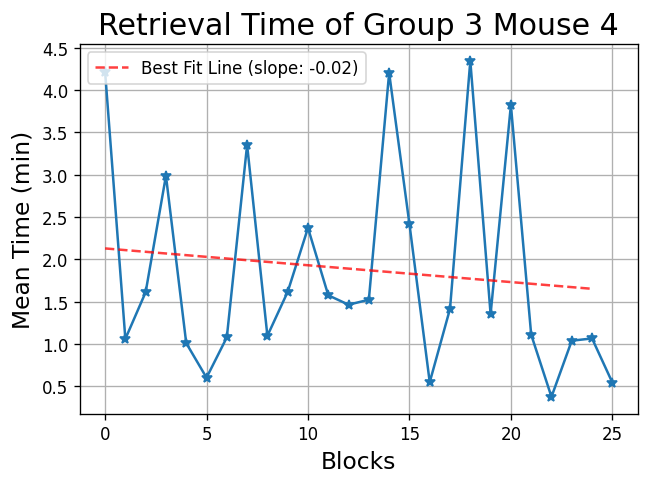

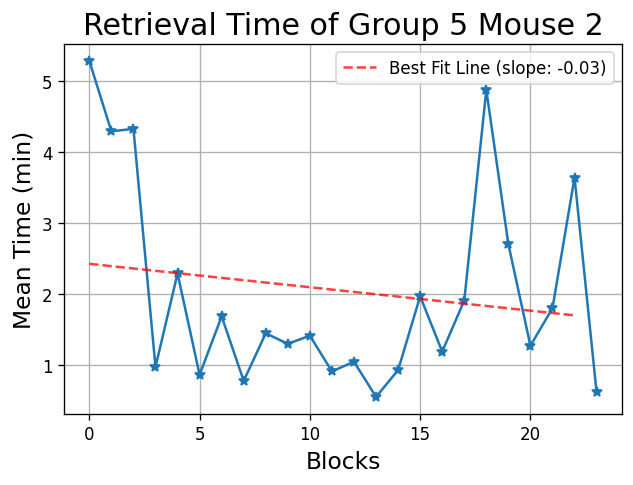

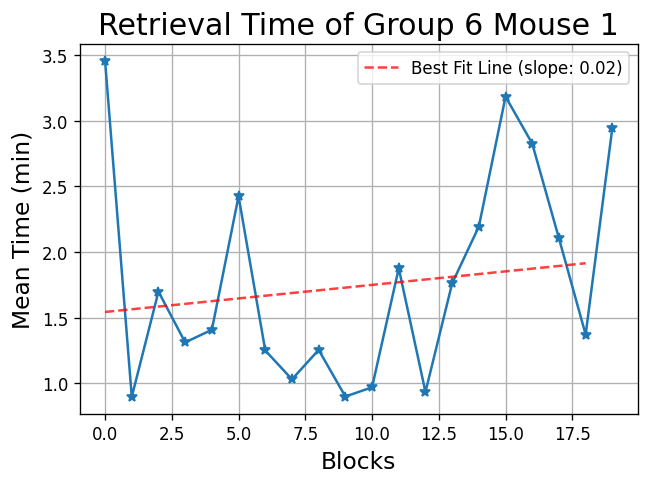

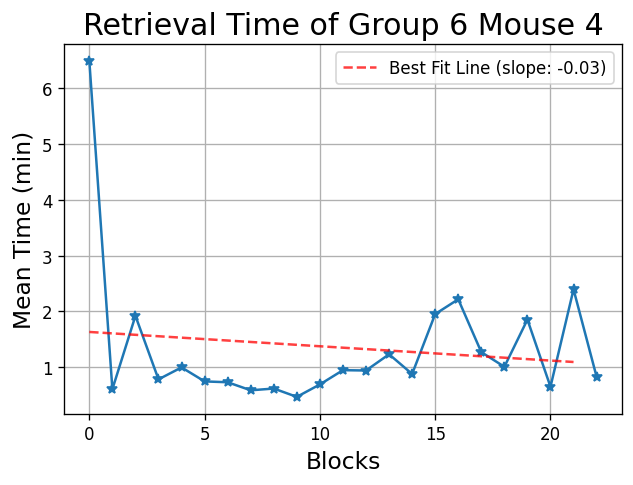

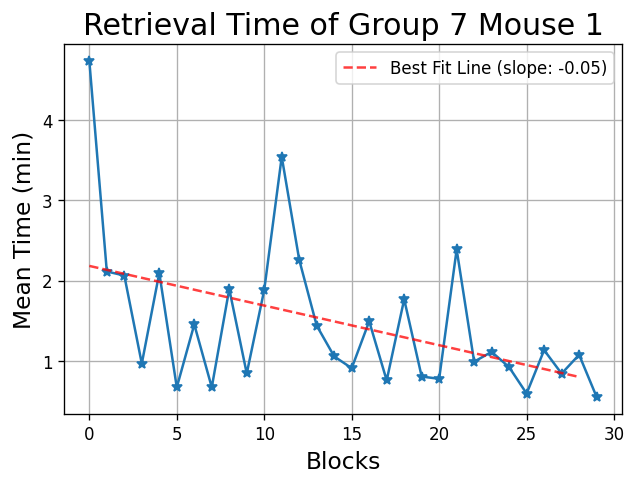

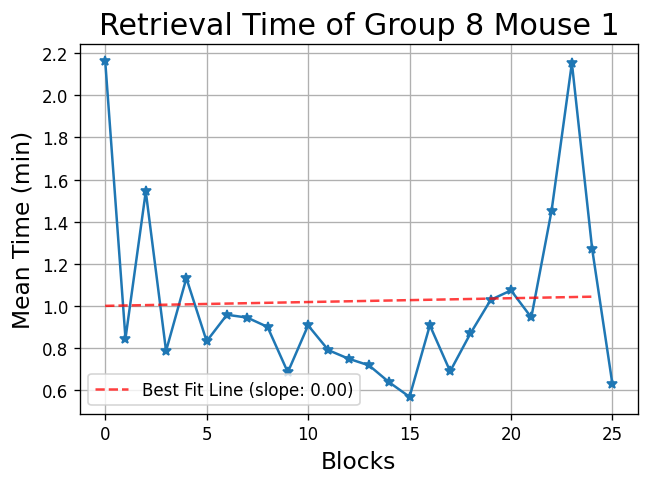

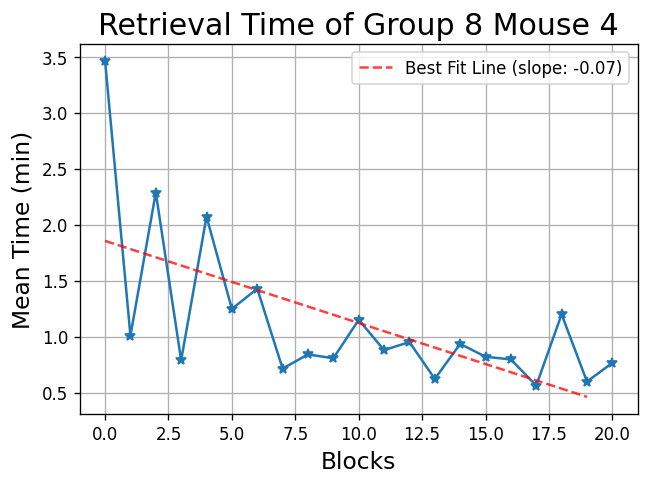

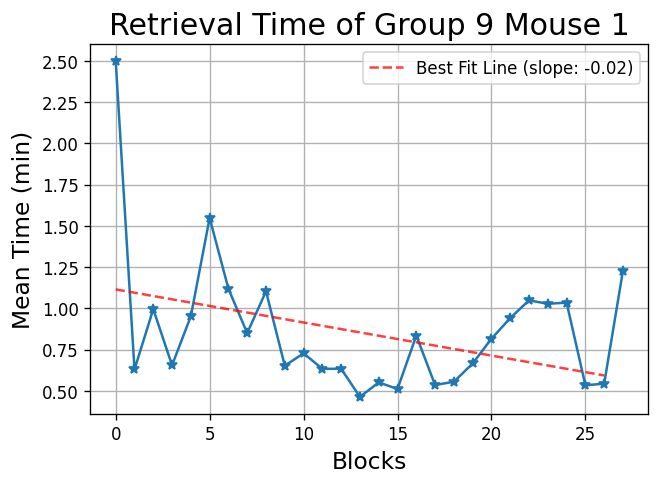

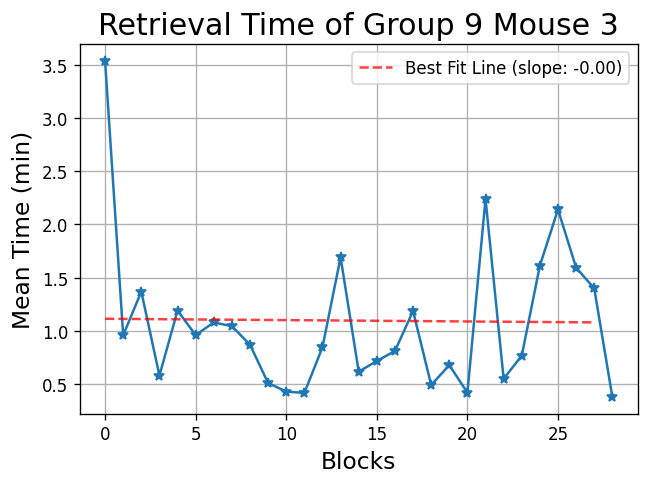

In [8]:
ctrl_all_times = []
ctrl_mean = []
ctrl_pred = []
ctrl_slope = []
rev_ctrl_time_dict = {}

for sheet in rev_ctrl_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_ctrl_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_ctrl_path, sheet, day=day, n_stds=3,
                            export_path=os.path.join(export_root, 'CASK_retrieval_time', f'ctrl_{sheet}.svg')
                            )
    ctrl_all_times.append(times)
    ctrl_mean.append(mean)
    ctrl_pred.append(pred)
    ctrl_slope.append(slope)
    rev_ctrl_time_dict[sheet] = mean

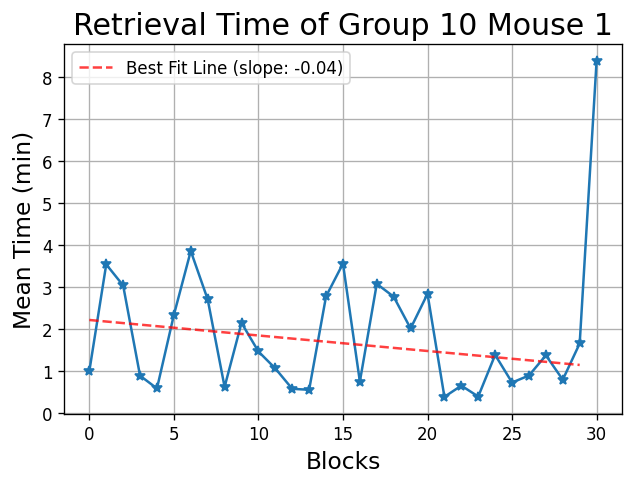

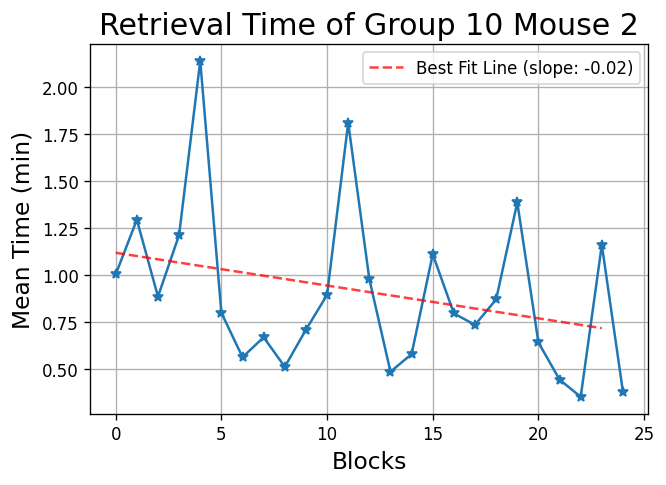

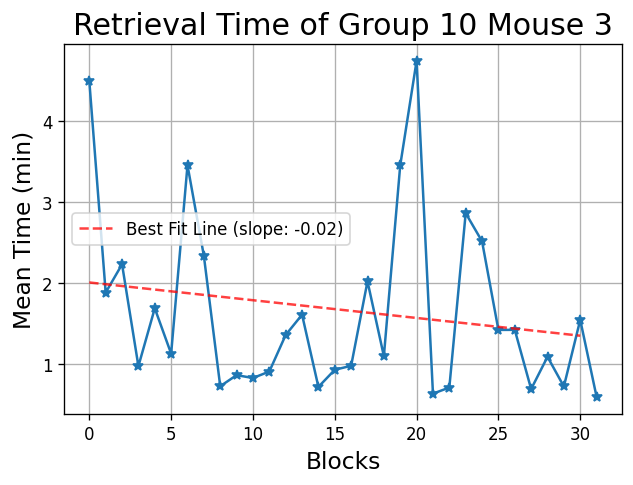

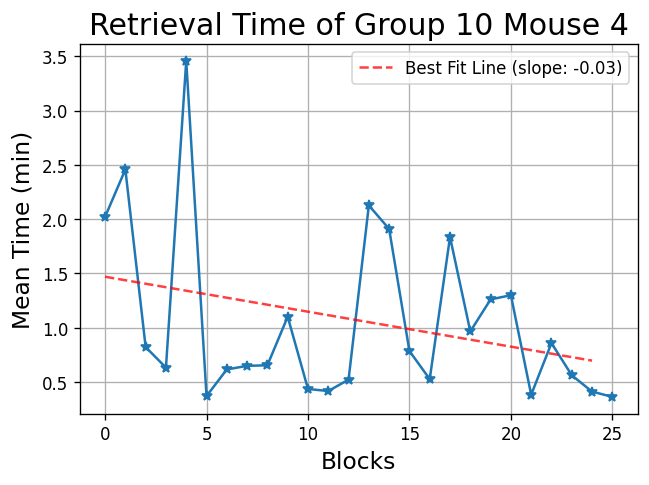

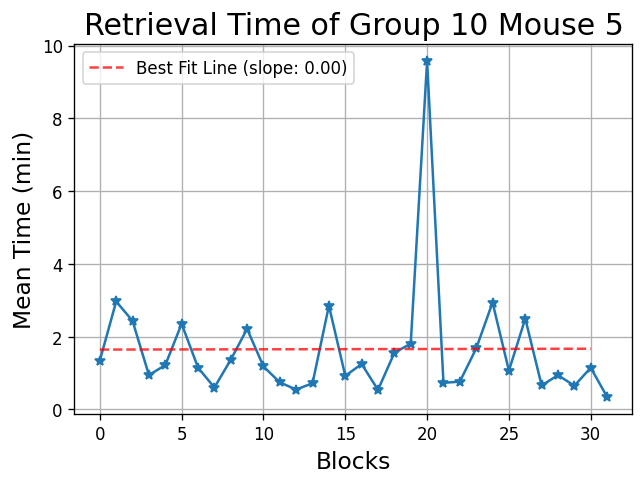

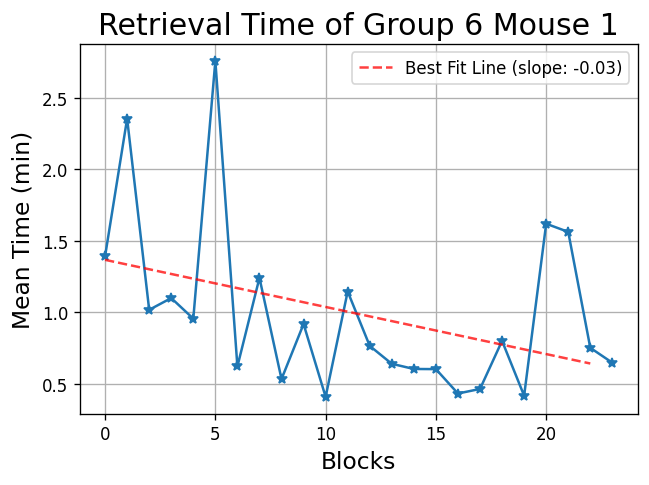

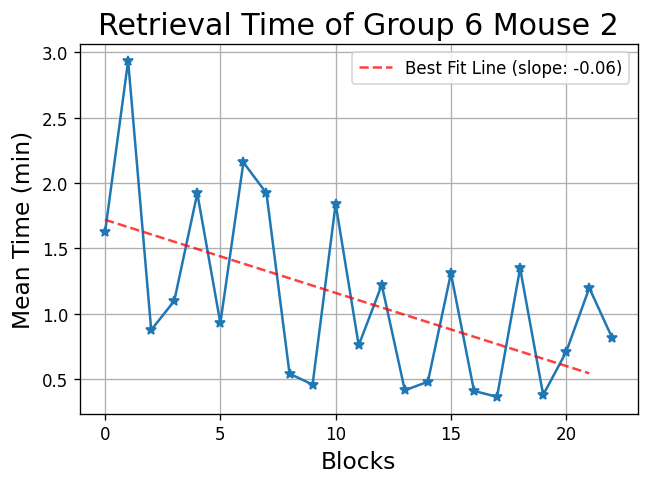

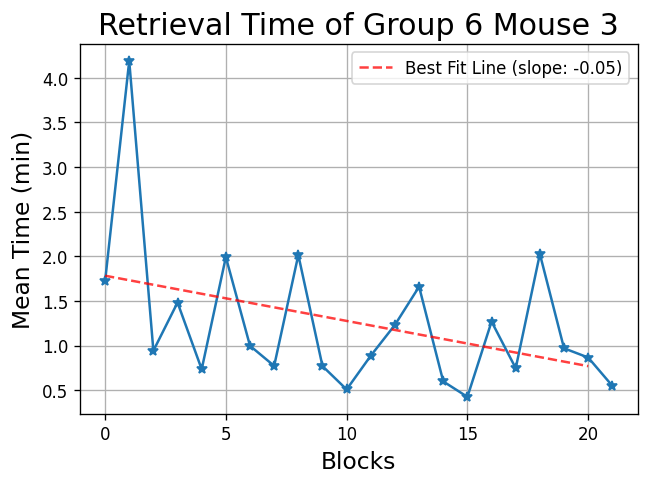

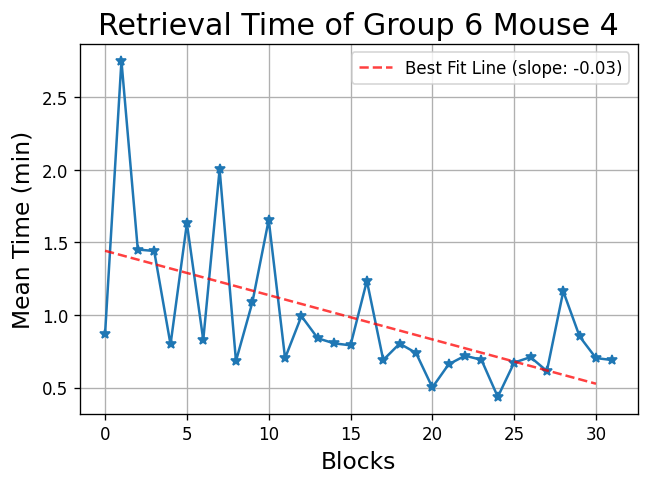

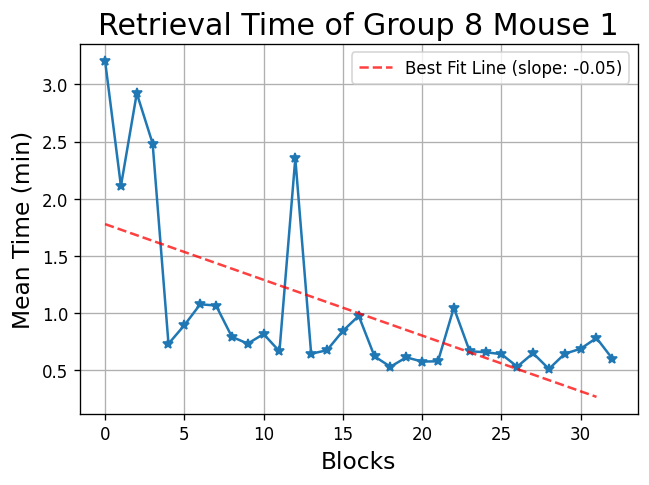

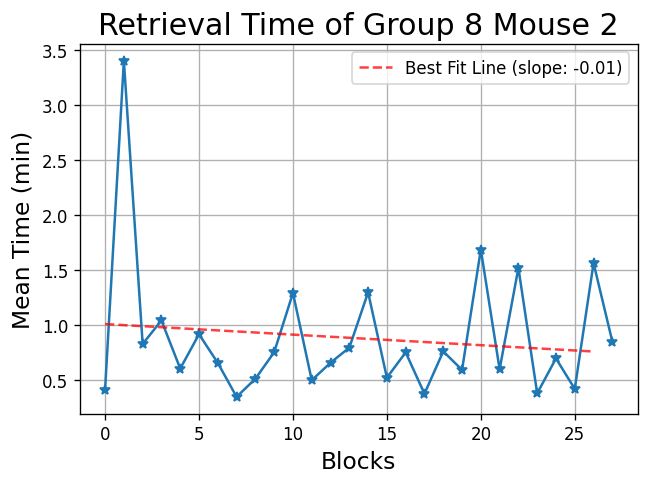

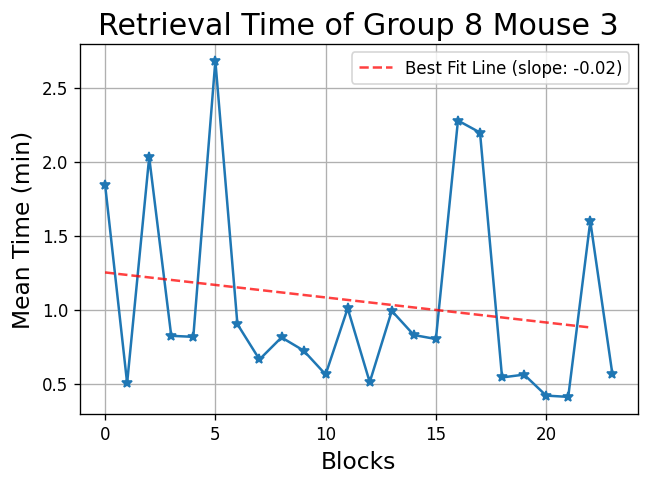

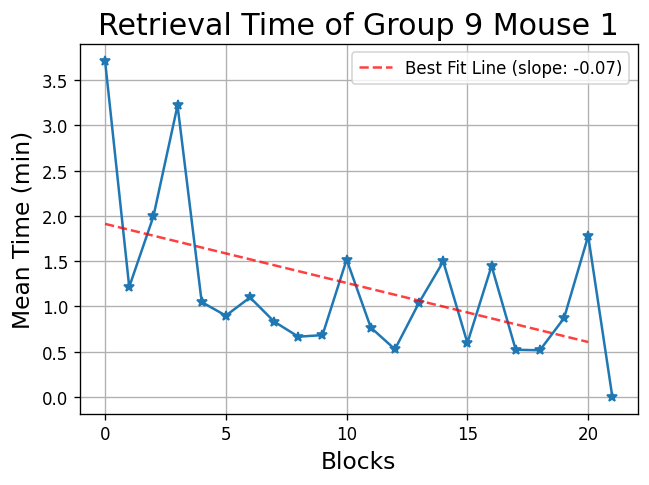

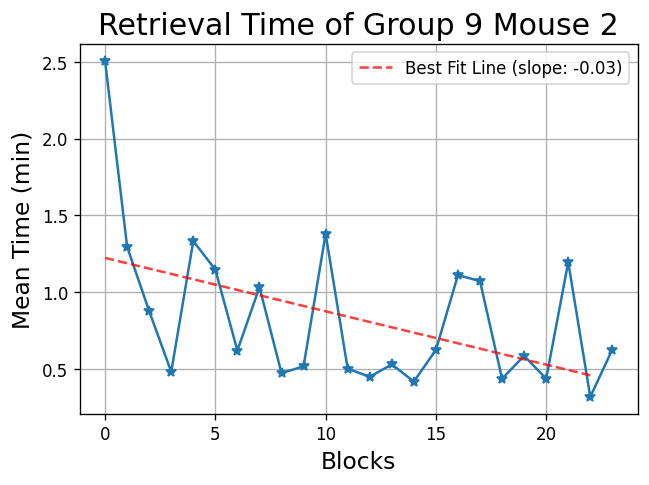

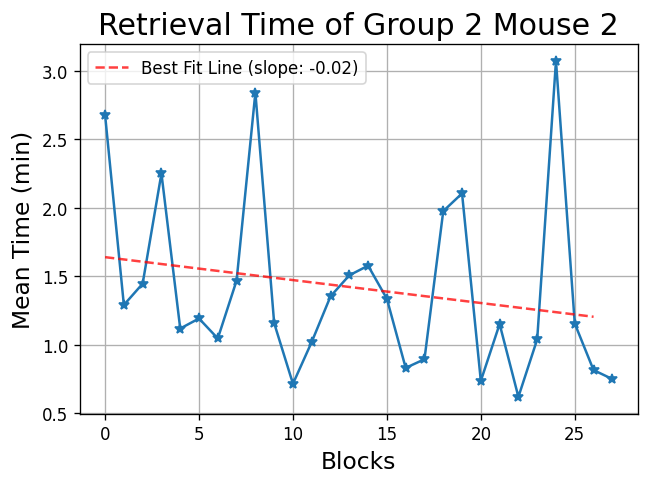

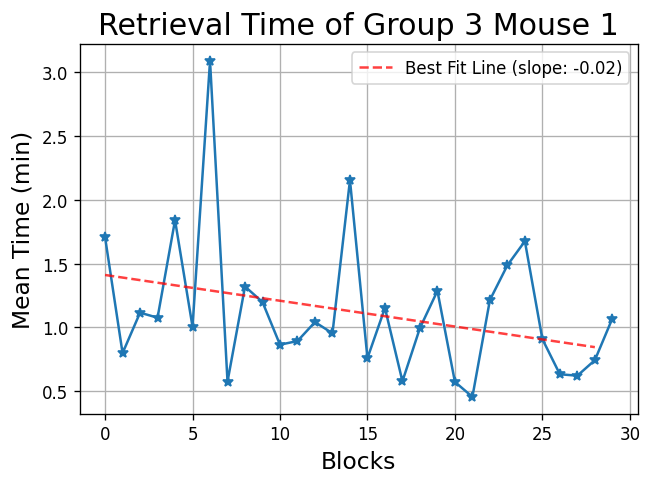

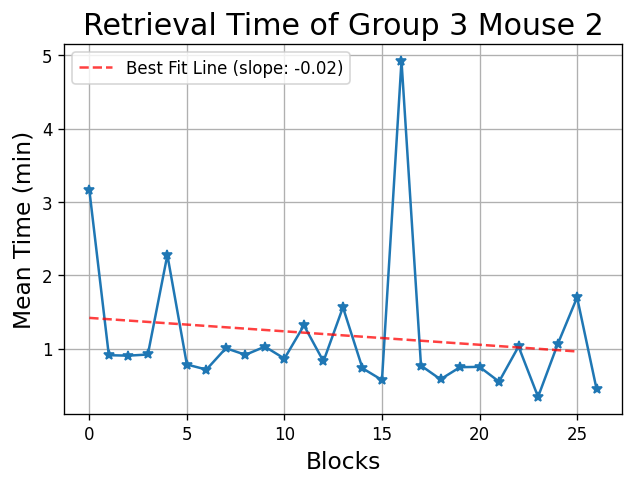

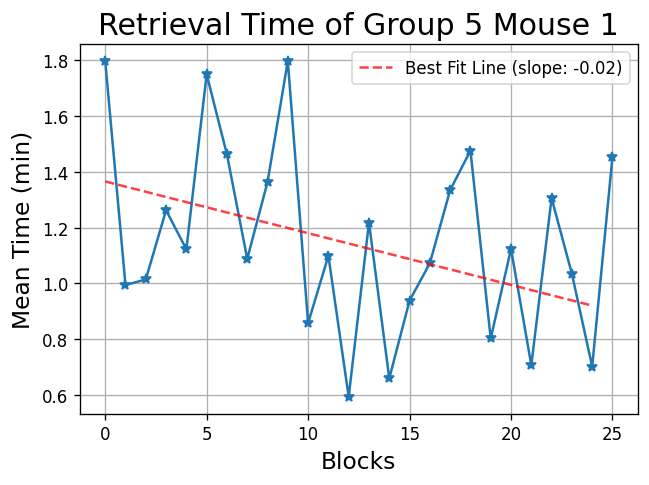

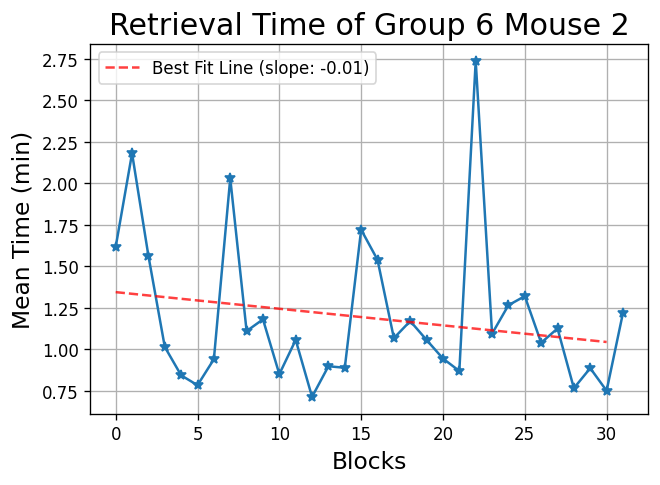

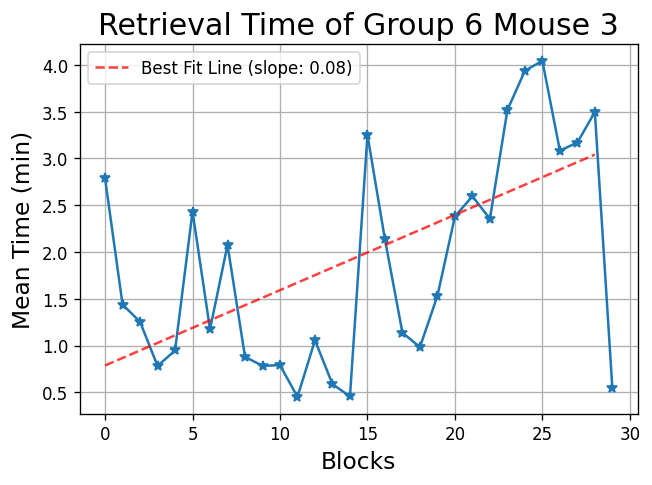

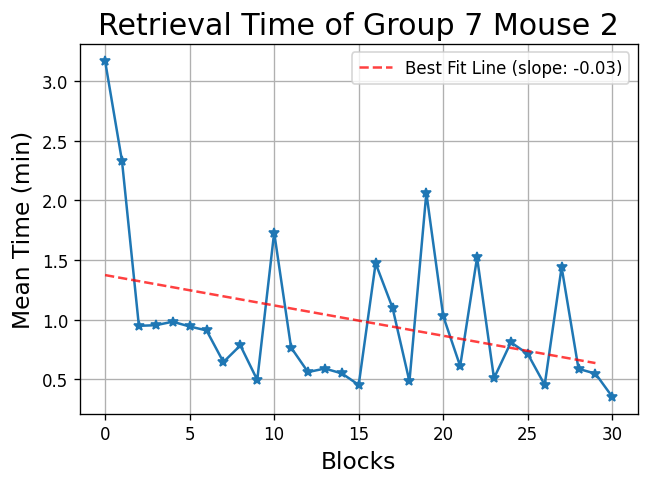

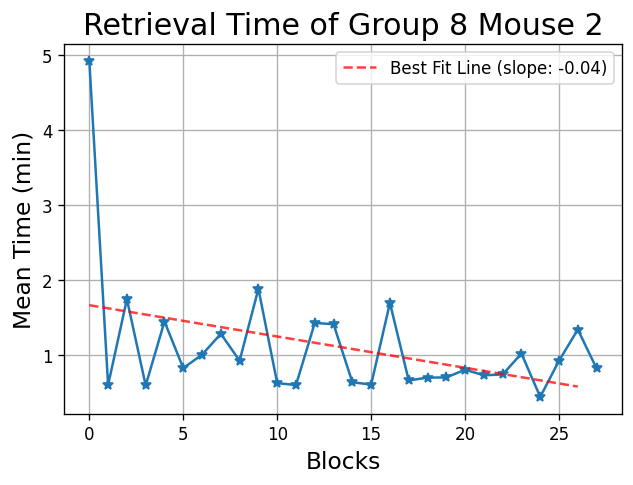

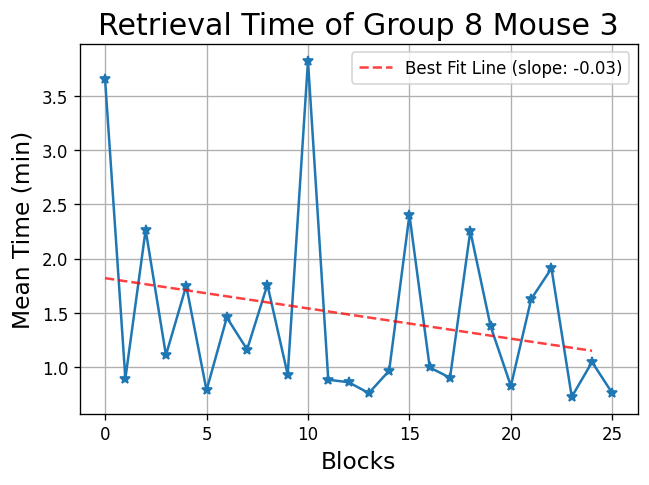

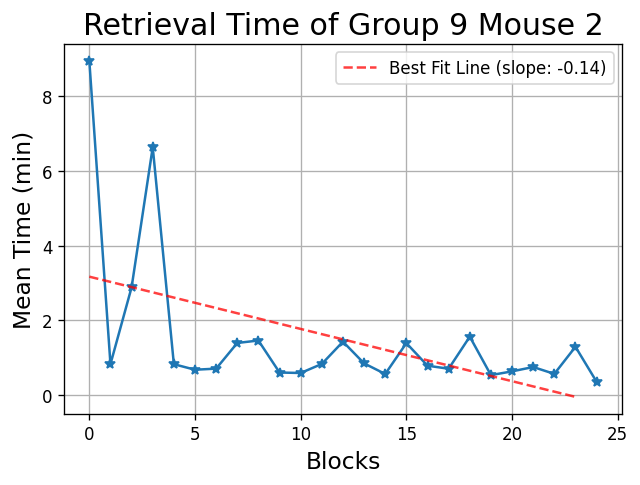

In [9]:
cask_all_times = []
cask_mean = []
cask_pred = []
cask_slope= []
rev_cask_time_dict = {}

for sheet in rev_cask_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_cask_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_cask_path, sheet, day=day, n_stds=3, 
                    export_path=os.path.join(export_root, 'CASK_retrieval_time', f'cask_{sheet}.svg'),
                    )

    cask_all_times.append(times)
    cask_mean.append(mean)
    cask_pred.append(pred)
    cask_slope.append(slope)
    rev_cask_time_dict[sheet] = mean

In [10]:
import numpy as np
print(np.mean(ctrl_mean), np.std(ctrl_mean))
print(np.mean(cask_mean), np.std(cask_mean))

1.8372489786646564 1.7374006849166572
1.4518378736626898 1.142881823590415


In [11]:
print(max(ctrl_mean))
ctrl_mean.remove(max(ctrl_mean))
print(max(ctrl_mean))
ctrl_mean.remove(max(ctrl_mean))
print(max(cask_mean))
cask_mean.remove(max(cask_mean))

7.754205607476636
7.670264150943396
6.770492753623188


Ctrl Size: 24
CASK Size: 23
Ctrl Average: 1.348
CASK Average: 1.221
Ctrl SE: 0.080
CASK SE: 0.059


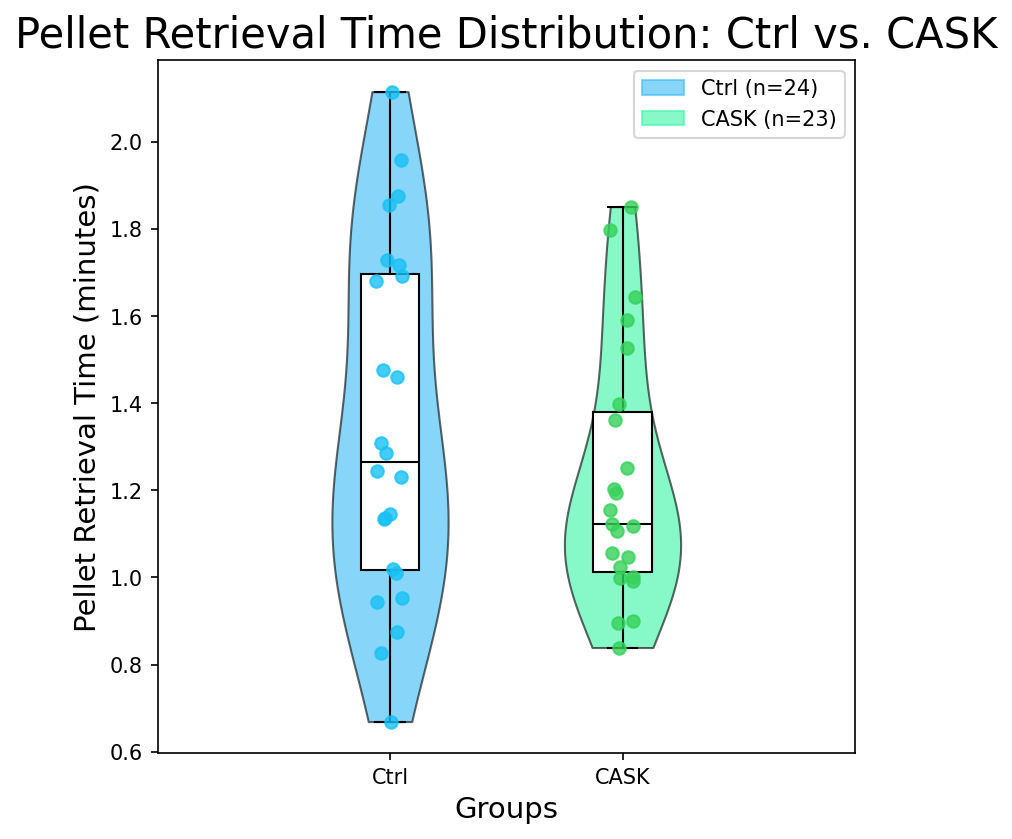

In [12]:
from accuracy import graph_group_stats
graph_group_stats(ctrl_mean, cask_mean, 'Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_retrieval_mean.svg'))

In [13]:
import intervals as invs

invs.perform_T_test(ctrl_mean, cask_mean, test_side='two-sided')

P Value is  0.22039395060132858
There is no significant difference between the two groups.


In [14]:
invs.perform_T_test(ctrl_slope, cask_slope, test_side='two-sided')

P Value is  0.4655035608202822
There is no significant difference between the two groups.


In [15]:
invs.perform_T_test(ctrl_pred, cask_pred, test_side='two-sided')

P Value is  0.07822603421672189
There is no significant difference between the two groups.


In [16]:
print(np.mean(ctrl_pred) + 3*np.std(ctrl_pred), max(ctrl_pred))
print(np.mean(cask_pred) + 3*np.std(cask_pred), max(cask_pred))

5.110326151873425 5.3863352380952385
2.663405254931005 3.121047052285545


In [17]:
print(max(ctrl_pred))
ctrl_pred.remove(max(ctrl_pred))
print(max(ctrl_pred))
ctrl_pred.remove(max(ctrl_pred))
print(max(cask_pred))
cask_pred.remove(max(cask_pred))

5.3863352380952385
5.141462857142854
3.121047052285545


Ctrl Size: 24
CASK Size: 23
Ctrl Average: 1.051
CASK Average: 0.762
Ctrl SE: 0.114
CASK SE: 0.079


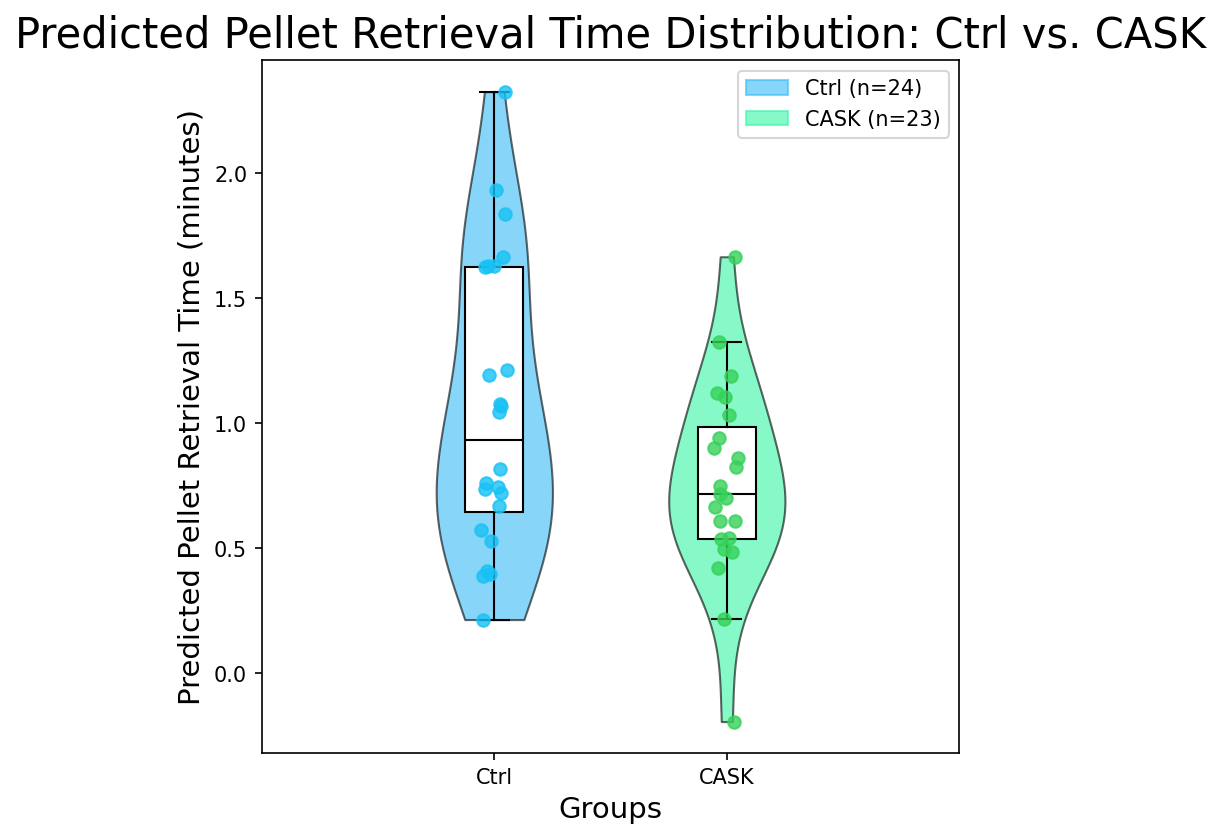

In [18]:
graph_group_stats(ctrl_pred, cask_pred, 'Predicted Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_retrieval_pred.svg'))

Ctrl Size: 26
CASK Size: 24
Ctrl Average: -0.040
CASK Average: -0.030
Ctrl SE: 0.011
CASK SE: 0.007


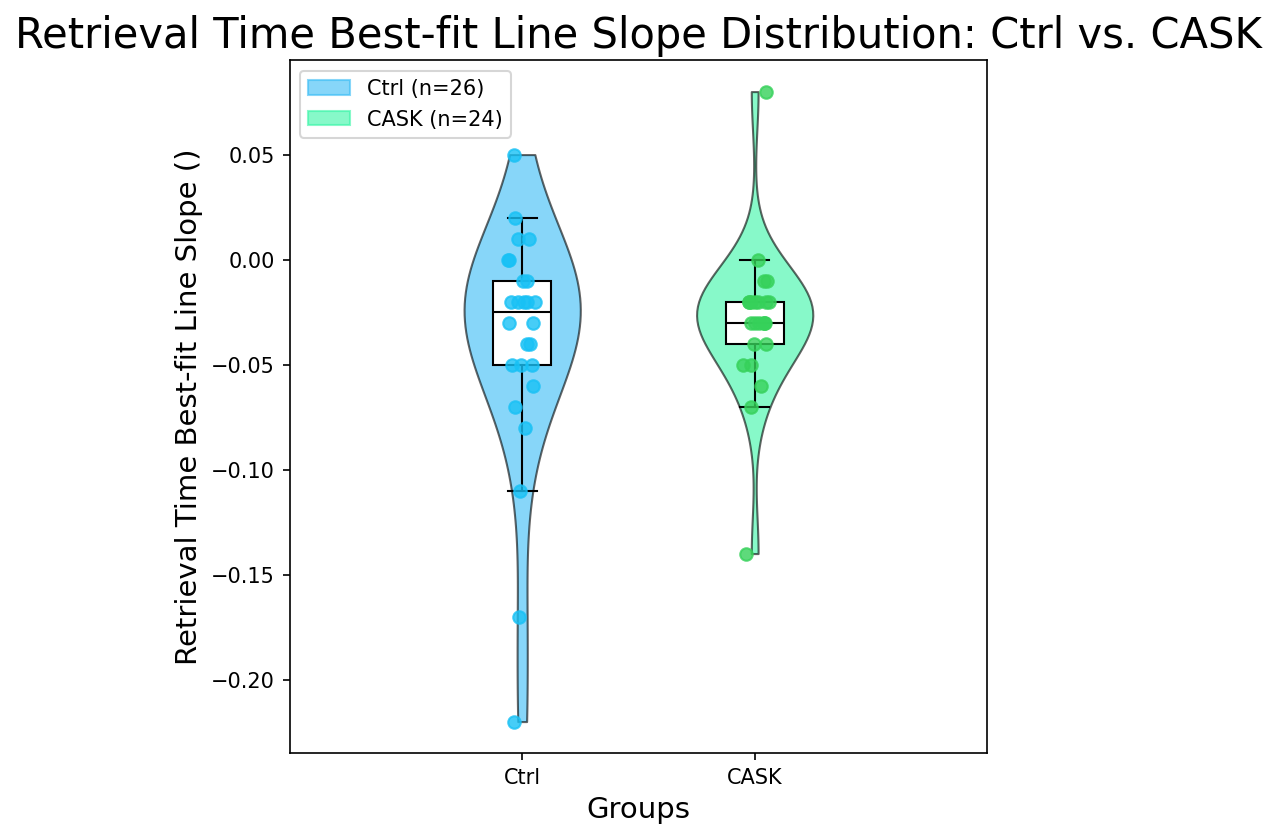

In [19]:
graph_group_stats(ctrl_slope, cask_slope, 'Retrieval Time Best-fit Line Slope', group_names=['Ctrl', 'CASK'], unit='', 
                  export_path=os.path.join(export_root, 'cask_retrieval_slope.svg'))

In [20]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []
fr1_ctrl_dict = {}

for sheet in fr1_ctrl_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_ctrl_path, sheet, remove_outlier=True, n_stds=2, day=3)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)
    fr1_ctrl_dict[sheet] = mean
    
cask_all_times = []
cask_means = []
cask_stds = []
fr1_cask_dict = {}

for sheet in fr1_cask_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_cask_path, sheet, remove_outlier=True, n_stds=2, day=3)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)
    fr1_cask_dict[sheet] = mean

In [21]:
ctrl_means.remove(max(ctrl_means))

Ctrl Size: 34
CASK Size: 31
Ctrl Average: 2.707
CASK Average: 2.279
Ctrl SE: 0.182
CASK SE: 0.128


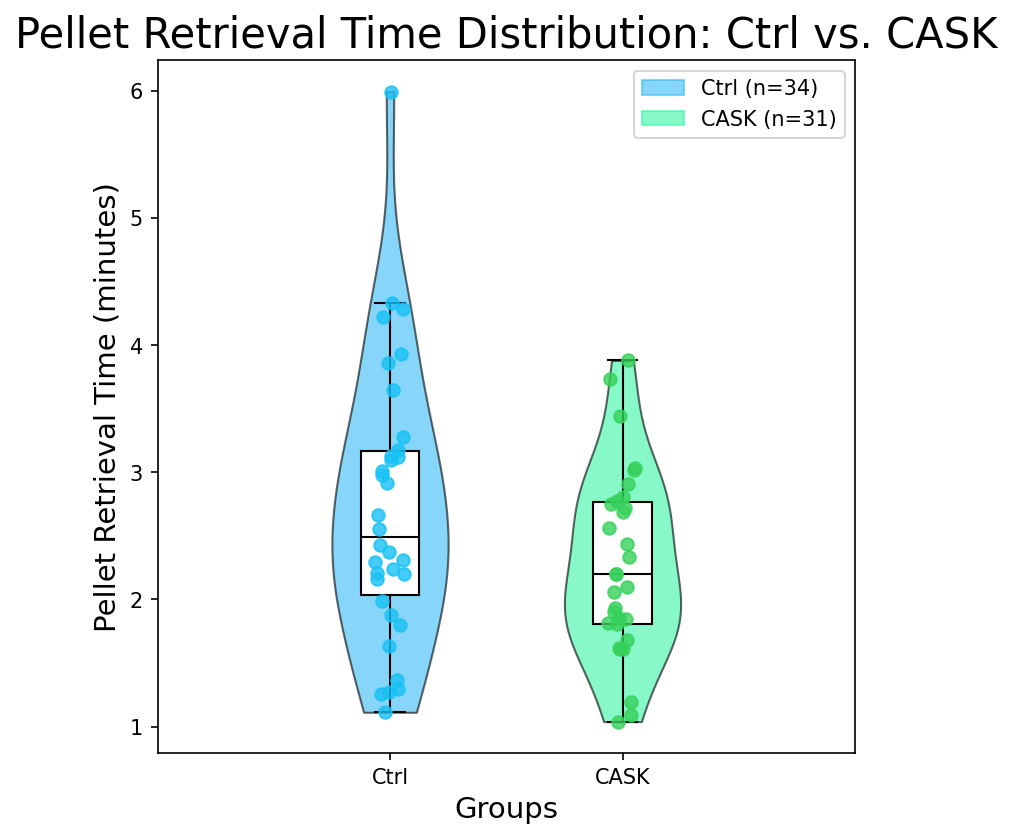

In [22]:
graph_group_stats(ctrl_means, cask_means, 'Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_fr1_retrieval_mean.svg'))

In [23]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='two-sided')

P Value is  0.067943666346603
There is no significant difference between the two groups.


In [24]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='two-sided')

P Value is  0.08943678822759786
There is no significant difference between the two groups.
